In [12]:
import pandas as pd
import nltk
import spacy

from IPython.display import Image

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import stylecloud

nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\polsa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\polsa\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\polsa\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
movies = pd.read_csv ("../Final-project/data/movies.csv")
movies

,id,title,genres,original_language,overview,popularity,production_companies,release_date,budget,revenue,runtime,status,tagline,vote_average,vote_count,credits,keywords,poster_path,backdrop_path,recommendations
0,615656,Meg 2: The Trench,Action-Science Fiction-Horror,en,An exploratory dive into the deepest depths of...,8763.998,Apelles Entertainment-Warner Bros. Pictures-di...,2023-08-02,129000000.0,352056482.0,116.0,Released,Back for seconds.,7.079,1365.0,Jason Statham-Wu Jing-Shuya Sophia Cai-Sergio ...,based on novel or book-sequel-kaiju,/4m1Au3YkjqsxF8iwQy0fPYSxE0h.jpg,/qlxy8yo5bcgUw2KAmmojUKp4rHd.jpg,1006462-298618-569094-1061181-346698-1076487-6...
1,758323,The Pope's Exorcist,Horror-Mystery-Thriller,en,Father Gabriele Amorth Chief Exorcist of the V...,5953.227,Screen Gems-2.0 Entertainment-Jesus & Mary-Wor...,2023-04-05,18000000.0,65675816.0,103.0,Released,Inspired by the actual files of Father Gabriel...,7.433,545.0,Russell Crowe-Daniel Zovatto-Alex Essoe-Franco...,spain-rome italy-vatican-pope-pig-possession-c...,/9JBEPLTPSm0d1mbEcLxULjJq9Eh.jpg,/hiHGRbyTcbZoLsYYkO4QiCLYe34.jpg,713704-296271-502356-1076605-1084225-1008005-9...
2,667538,Transformers: Rise of the Beasts,Action-Adventure-Science Fiction,en,When a new threat capable of destroying the en...,5409.104,Skydance-Paramount-di Bonaventura Pictures-Bay...,2023-06-06,200000000.0,407045464.0,127.0,Released,Unite or fall.,7.340,1007.0,Anthony Ramos-Dominique Fishback-Luna Lauren V...,peru-alien-end of the world-based on cartoon-b...,/gPbM0MK8CP8A174rmUwGsADNYKD.jpg,/woJbg7ZqidhpvqFGGMRhWQNoxwa.jpg,496450-569094-298618-385687-877100-598331-4628...
3,640146,Ant-Man and the Wasp: Quantumania,Action-Adventure-Science Fiction,en,Super-Hero partners Scott Lang and Hope van Dy...,4425.387,Marvel Studios-Kevin Feige Productions,2023-02-15,200000000.0,475766228.0,125.0,Released,Witness the beginning of a new dynasty.,6.507,2811.0,Paul Rudd-Evangeline Lilly-Jonathan Majors-Kat...,hero-ant-sequel-superhero-based on comic-famil...,/qnqGbB22YJ7dSs4o6M7exTpNxPz.jpg,/m8JTwHFwX7I7JY5fPe4SjqejWag.jpg,823999-676841-868759-734048-267805-965839-1033...
4,677179,Creed III,Drama-Action,en,After dominating the boxing world Adonis Creed...,3994.342,Metro-Goldwyn-Mayer-Proximity Media-Balboa Pro...,2023-03-01,75000000.0,269000000.0,116.0,Released,You can't run from your past.,7.262,1129.0,Michael B. Jordan-Tessa Thompson-Jonathan Majo...,philadelphia pennsylvania-husband wife relatio...,/cvsXj3I9Q2iyyIo95AecSd1tad7.jpg,/5i6SjyDbDWqyun8klUuCxrlFbyw.jpg,965839-267805-943822-842942-1035806-823999-107...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722475,603360,An Affair,Drama,ru,A disaster film.,0.600,MetraFilms,2013-06-04,0.0,0.0,8.0,Released,NaN,0.000,0.0,Egor Koreshkov-Mariya Kolosovskaya-Vladimir Ts...,NaN,/xsew2pC5qF5PjS1vRpy1lpRcRrm.jpg,NaN,NaN
722476,389473,Strange Septembers: The Hill Abduction & the E...,NaN,en,The Two World-Famous UFO Experiences Took Plac...,0.600,NaN,2016-04-01,0.0,0.0,93.0,Released,NaN,0.000,0.0,NaN,NaN,NaN,NaN,NaN
722477,461444,The Emperor's Bed,Drama-War,sq,In the first day of liberation partisan Meke e...,0.600,NaN,1973-11-28,0.0,0.0,28.0,Released,NaN,0.000,0.0,Pandi Raidhi,world war ii-palace-slice of life-war,/2sqlUzWJkCPIivt4Uq6HxwUdZJA.jpg,/b4jvgzenTY9DDIAxMOJRAMCtMZn.jpg,NaN
722478,423700,Body Tape,NaN,en,1: Touching 2: Boxing 3: Feeling 4: Hearing...,0.600,NaN,1970-01-01,0.0,0.0,4.0,Released,NaN,0.000,0.0,NaN,NaN,/pLUiP2GG5g0lIrye5lJwnlp3rst.jpg,NaN,NaN


In [14]:
movies = movies[['id', 'title', 'overview']]

In [18]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

df_movies_sentiment = movies[['id', 'title', 'overview']]

sid = SentimentIntensityAnalyzer()
df_movies_sentiment.reset_index(inplace=True, drop=True)

df_movies_sentiment[['neg', 'neu', 'pos', 'compound']] = df_movies_sentiment['overview'].apply(lambda x: sid.polarity_scores(x) if pd.notnull(x) else {'neg': None, 'neu': None, 'pos': None, 'compound': None}).apply(pd.Series)

df_movies_sentiment.head()


,id,title,overview,neg,neu,pos,compound
0,615656,Meg 2: The Trench,An exploratory dive into the deepest depths of...,0.226,0.711,0.063,-0.7506
1,758323,The Pope's Exorcist,Father Gabriele Amorth Chief Exorcist of the V...,0.288,0.712,0.000,-0.8658
2,667538,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,0.133,0.678,0.189,0.4767
3,640146,Ant-Man and the Wasp: Quantumania,Super-Hero partners Scott Lang and Hope van Dy...,0.032,0.875,0.093,0.5267
4,677179,Creed III,After dominating the boxing world Adonis Creed...,0.119,0.729,0.152,0.2487


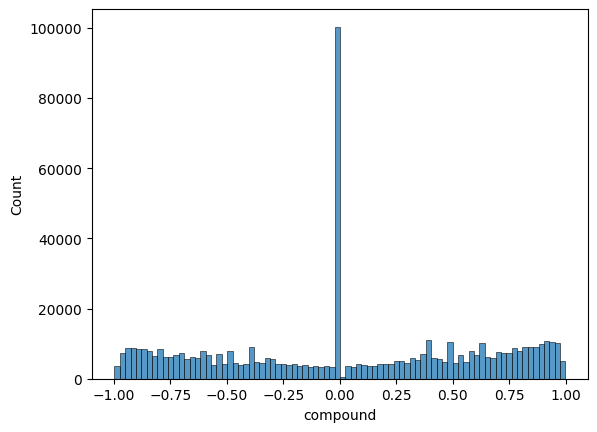

In [20]:
import seaborn as sns
sns.histplot(x=df_movies_sentiment.compound);

In [22]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import nltk
nltk.download('punkt')
nltk.download('stopwords')

df_movies_sentiment['tokenized_overview'] = df_movies_sentiment['overview'].apply(lambda x: word_tokenize(str(x).lower()))

stop_words = set(stopwords.words('english'))
df_movies_sentiment['tokenized_overview'] = df_movies_sentiment['tokenized_overview'].apply(lambda tokens: [word for word in tokens if word.isalnum() and word not in stop_words])

df_movies_sentiment[['id', 'title', 'overview', 'tokenized_overview', 'neg', 'neu', 'pos', 'compound']].head()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\polsa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\polsa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,overview,tokenized_overview,neg,neu,pos,compound
0,615656,Meg 2: The Trench,An exploratory dive into the deepest depths of...,"[exploratory, dive, deepest, depths, ocean, da...",0.226,0.711,0.063,-0.7506
1,758323,The Pope's Exorcist,Father Gabriele Amorth Chief Exorcist of the V...,"[father, gabriele, amorth, chief, exorcist, va...",0.288,0.712,0.000,-0.8658
2,667538,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,"[new, threat, capable, destroying, entire, pla...",0.133,0.678,0.189,0.4767
3,640146,Ant-Man and the Wasp: Quantumania,Super-Hero partners Scott Lang and Hope van Dy...,"[partners, scott, lang, hope, van, dyne, along...",0.032,0.875,0.093,0.5267
4,677179,Creed III,After dominating the boxing world Adonis Creed...,"[dominating, boxing, world, adonis, creed, thr...",0.119,0.729,0.152,0.2487


In [24]:
lemmatizer = WordNetLemmatizer()
df_movies_sentiment['tokenized_overview'] = df_movies_sentiment['overview'].apply(lambda x: word_tokenize(str(x).lower()))
df_movies_sentiment['tokenized_overview'] = df_movies_sentiment['tokenized_overview'].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words])

df_movies_sentiment[['id', 'title', 'overview', 'tokenized_overview', 'neg', 'neu', 'pos', 'compound']].head()


,id,title,overview,tokenized_overview,neg,neu,pos,compound
0,615656,Meg 2: The Trench,An exploratory dive into the deepest depths of...,"[exploratory, dive, deepest, depth, ocean, dar...",0.226,0.711,0.063,-0.7506
1,758323,The Pope's Exorcist,Father Gabriele Amorth Chief Exorcist of the V...,"[father, gabriele, amorth, chief, exorcist, va...",0.288,0.712,0.000,-0.8658
2,667538,Transformers: Rise of the Beasts,When a new threat capable of destroying the en...,"[new, threat, capable, destroying, entire, pla...",0.133,0.678,0.189,0.4767
3,640146,Ant-Man and the Wasp: Quantumania,Super-Hero partners Scott Lang and Hope van Dy...,"[partner, scott, lang, hope, van, dyne, along,...",0.032,0.875,0.093,0.5267
4,677179,Creed III,After dominating the boxing world Adonis Creed...,"[dominating, boxing, world, adonis, creed, thr...",0.119,0.729,0.152,0.2487
